In [1]:
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
import keras

Using TensorFlow backend.


In [3]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print (train_images.shape) 
print (train_labels)

(60000, 28, 28)
[5 0 4 ... 5 6 8]


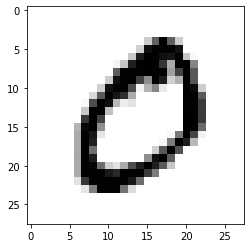

0


In [4]:
import matplotlib.pyplot as plt

digit = train_images[1]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

print (train_labels[1])

In [5]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [6]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

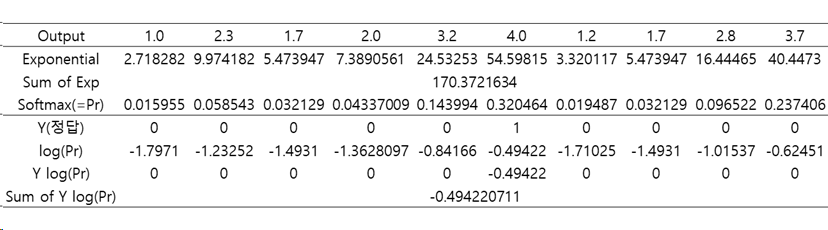

In [7]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [8]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [10]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
60000/60000 [==============================] - 1s 19us/step - loss: 0.2584 - accuracy: 0.9250
Epoch 2/5
60000/60000 [==============================] - 1s 15us/step - loss: 0.1034 - accuracy: 0.9692
Epoch 3/5
60000/60000 [==============================] - 1s 15us/step - loss: 0.0677 - accuracy: 0.9797
Epoch 4/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.0499 - accuracy: 0.9849
Epoch 5/5
60000/60000 [==============================] - 1s 15us/step - loss: 0.0372 - accuracy: 0.9888


In [11]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 35us/step


In [12]:
print('test_acc:', test_acc)

test_acc: 0.9790999889373779


In [13]:
prediction = network.predict(test_images)

In [14]:
prediction[0]

array([1.9718076e-10, 6.3236092e-12, 1.7180971e-06, 1.0671902e-05,
       2.3261872e-13, 2.3434897e-08, 2.0657179e-15, 9.9998736e-01,
       2.5066593e-09, 2.7530953e-07], dtype=float32)

In [15]:
import numpy as np

np.argmax(prediction[0])

7

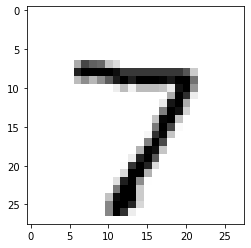

In [16]:
import matplotlib.pyplot as plt

digit = np.reshape(test_images[0], (28, 28))
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()